In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка финального датасета из: ../data/moex_final_dataset.csv
Данные успешно загружены.

Найдены следующие TBM колонки для анализа: ['tbm_2d', 'tbm_3d', 'tbm_5d', 'tbm_7d', 'tbm_10d', 'tbm_15d', 'tbm_20d', 'tbm_25d', 'tbm_30d', 'tbm_40d', 'tbm_60d', 'tbm_friday']

--- Анализ для колонки: tbm_2d ---
Абсолютное количество меток:
tbm_2d
-1     4264
 0    20190
 1     5393
Name: count, dtype: int64

Процентное соотношение:
tbm_2d
-1    14.29
 0    67.64
 1    18.07
Name: proportion, dtype: float64

--- Анализ для колонки: tbm_3d ---
Абсолютное количество меток:
tbm_3d
-1     6197
 0    15952
 1     7698
Name: count, dtype: int64

Процентное соотношение:
tbm_3d
-1    20.76
 0    53.45
 1    25.79
Name: proportion, dtype: float64

--- Анализ для колонки: tbm_5d ---
Абсолютное количество меток:
tbm_5d
-1     8969
 0    10117
 1    10761
Name: count, dtype: int64

Процентное соотношение:
tbm_5d
-1    30.05
 0    33.90
 1    36.05
Name: proportion, dtype: float64

--- Анализ для колонки: tbm_

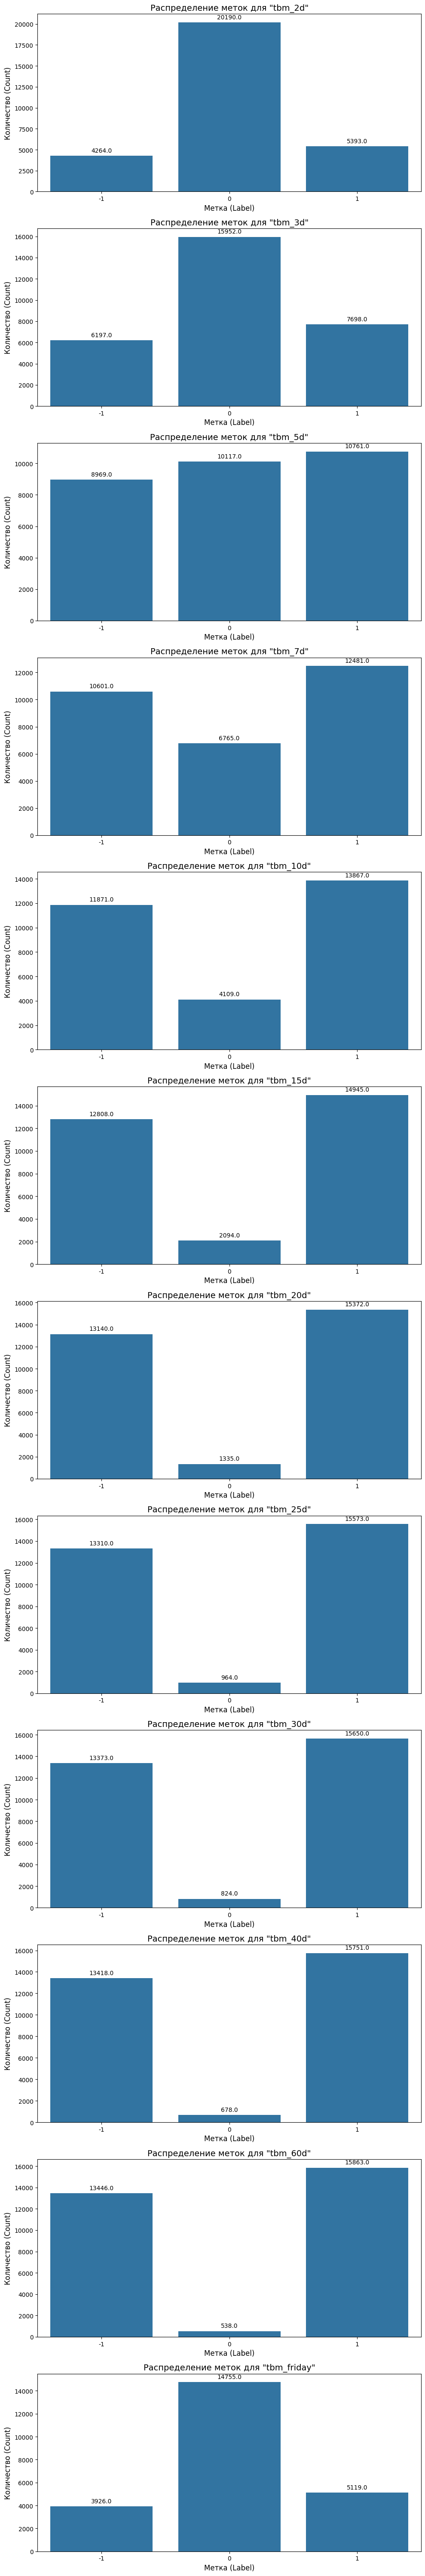

In [2]:
# ==============================================================================
# ОСНОВНОЙ СКРИПТ АНАЛИЗА
# ==============================================================================
data_folder = "../data/"
final_dataset_filename = 'moex_final_dataset.csv'

# --- ШАГ 1: Загрузка финального датасета ---
print(f"Загрузка финального датасета из: {data_folder + final_dataset_filename}")
try:
    df = pd.read_csv(data_folder + final_dataset_filename)
    print("Данные успешно загружены.")
except FileNotFoundError:
    print(f"ОШИБКА: Файл не найден. Убедитесь, что скрипт tbm_labeling.py был запущен.")
    exit()
    
# --- ШАГ 2: Находим все колонки с TBM метками ---
# Ищем колонки, которые начинаются с 'tbm_'
tbm_columns = [col for col in df.columns if col.startswith('tbm_')]

if not tbm_columns:
    print("ОШИБКА: В файле не найдено ни одной колонки с TBM метками (например, 'tbm_5d').")
    exit()

print(f"\nНайдены следующие TBM колонки для анализа: {tbm_columns}")

# --- ШАГ 3: Анализ и визуализация для каждой колонки ---
# Создаем несколько графиков, по одному для каждой TBM-колонки
fig, axes = plt.subplots(len(tbm_columns), 1, figsize=(10, 5 * len(tbm_columns)))
# Если у нас только одна колонка, axes не будет массивом, исправляем это
if len(tbm_columns) == 1:
    axes = [axes]

for i, col_name in enumerate(tbm_columns):
    print(f"\n--- Анализ для колонки: {col_name} ---")

        
    clean_labels = df[col_name].dropna()
    clean_labels = clean_labels.astype(int)
    
    # 1. Выводим числовую статистику
    label_counts = clean_labels.value_counts().sort_index()
    label_percentages = clean_labels.value_counts(normalize=True).sort_index() * 100
    
    print("Абсолютное количество меток:")
    print(label_counts)
    print("\nПроцентное соотношение:")
    print(label_percentages.round(2))
    



    # 2. Строим график
    ax = axes[i]
    # sns.countplot(x=col_name, data=clean_labels, ax=ax, order=[-1, 0, 1])
    sns.countplot(x=clean_labels, ax=ax, order=[-1, 0, 1])

    # sns.countplot(x=col_name, data=df_copy.dropna(subset=[col_name]), ax=ax, order=[-1, 0, 1])
    ax.set_title(f'Распределение меток для "{col_name}"', fontsize=14)
    ax.set_xlabel("Метка (Label)", fontsize=12)
    ax.set_ylabel("Количество (Count)", fontsize=12)
    
    # Добавляем подписи с количеством над столбцами
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

# Показываем все графики
plt.tight_layout() # Чтобы графики не накладывались друг на друга
plt.show()